# [제곱수의 합](https://www.acmicpc.net/problem/1699)

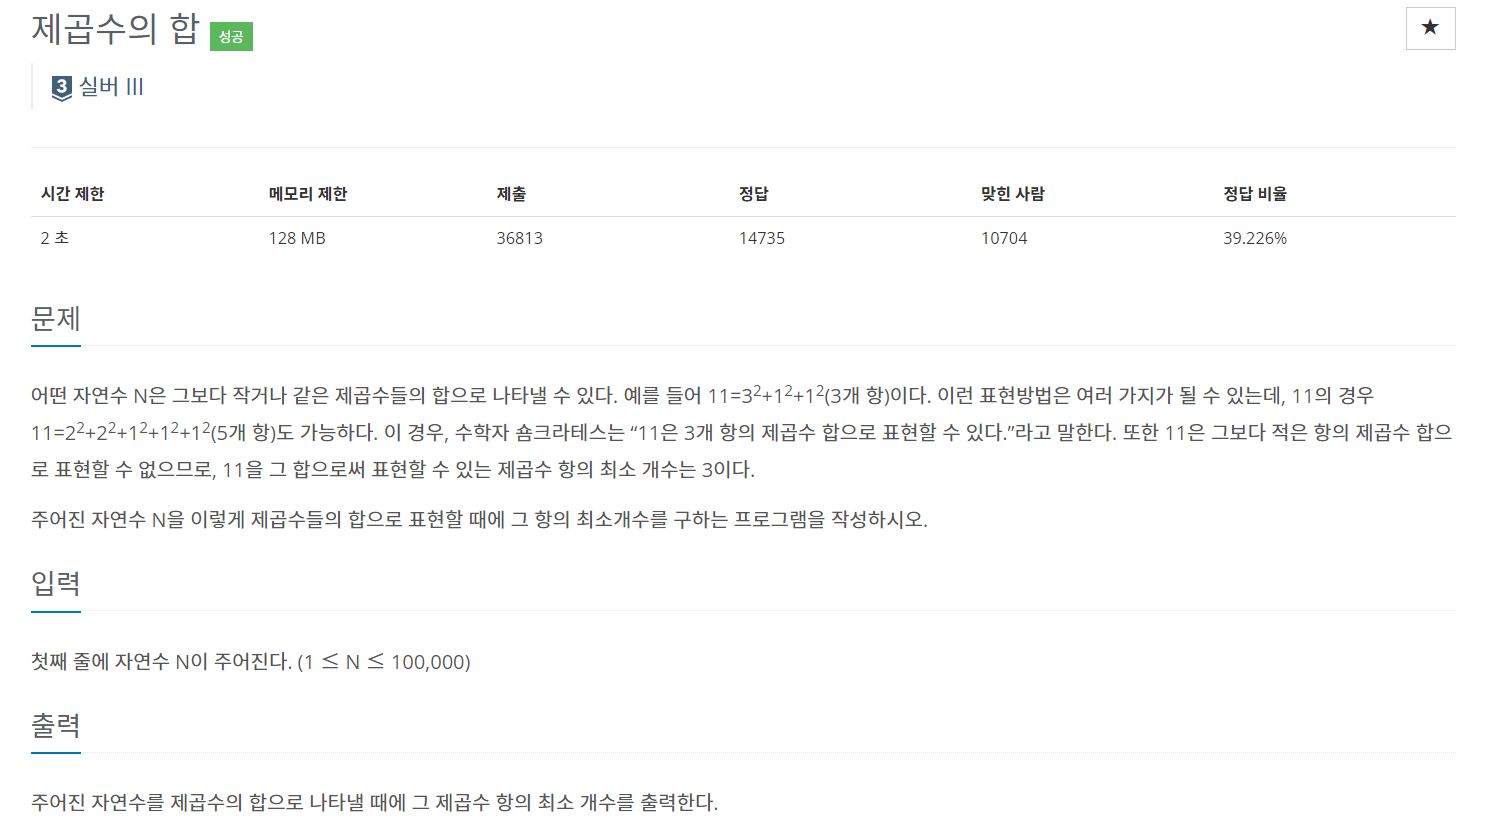

<!-- ![](image/1699.png) -->
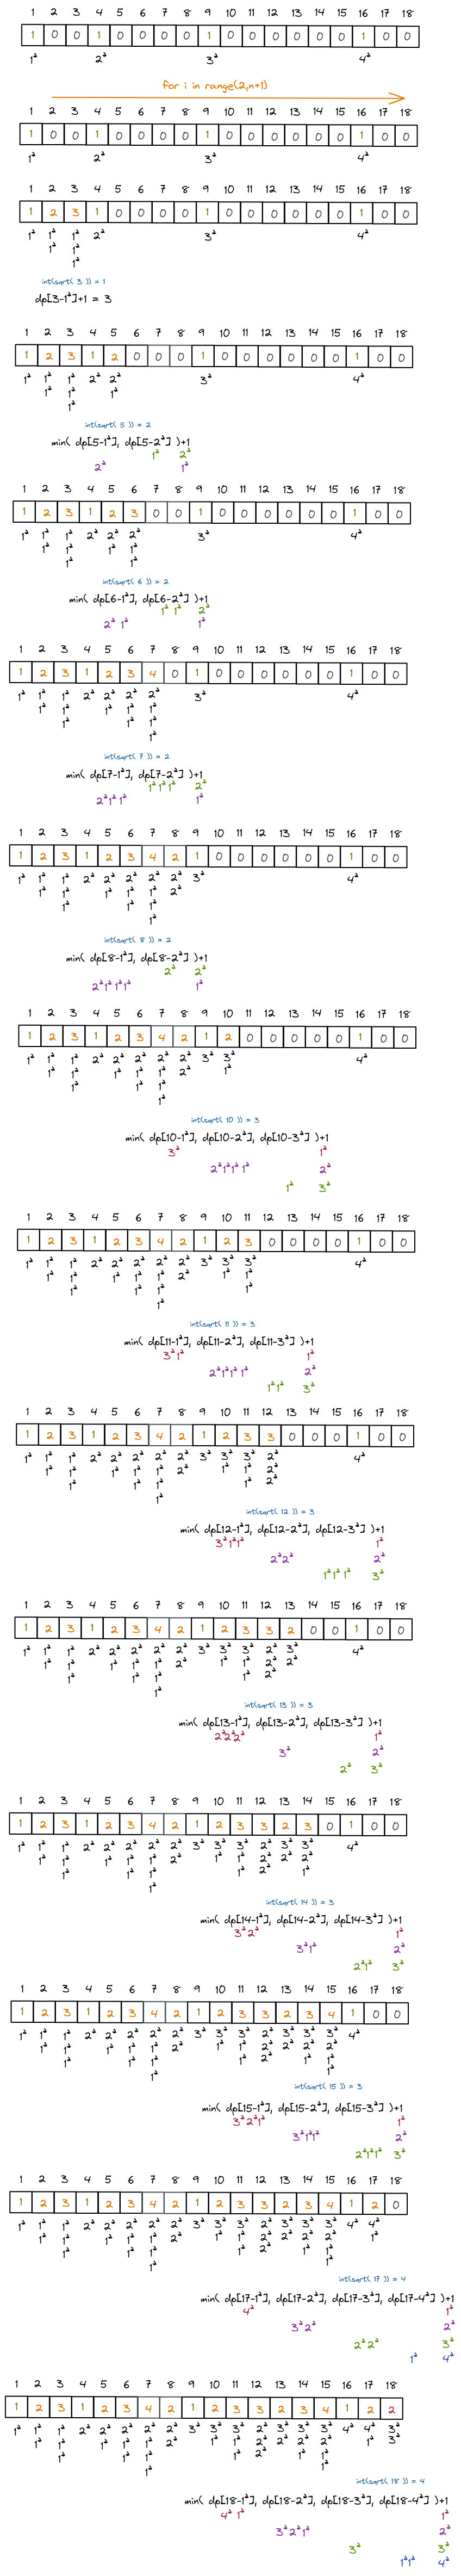

In [ ]:
from math import sqrt

In [ ]:
from collections import deque

In [ ]:
def solution(n):
    x = int(sqrt(n))

    # 구해야 하는 값 : n의 제곱수 항 최소 개수
    dp = [0]*(n+1)
    for i in range(1, x+1):
        dp[i**2] = 1  # 초깃값들. 모든 제곱수는 항이 1개

    for i in range(2, n+1):
        if dp[i] == 0:  # 아직 구하지 않은 수라면
            a = int(sqrt(i))
            # 무작정 이걸로 끝내버린다면 12 = 3^2 + (1^2)*3 으로 4가 되어버림. 실제 답은 (4^2)*3으로 3
            dp[i] = dp[i-a**2] + 1
            for k in range(1, a):
                if dp[i] == 1 or dp[i] == 2:
                    break
                dp[i] = min(dp[i], dp[i-k**2]+1)
    print(dp[n])


solution(int(input()))

---

In [ ]:
def solution2(n):  # using queue - 시간 훨씬 오래 걸림
    ls = []
    q = deque()
    dp = [0]*(n+1)
    for i in range(1, int(sqrt(n))+1):
        a = i**2
        ls.append(a) # 제곱수 리스트
        q.append(a) # 제곱수들을 먼저 큐에 넣는다
        dp[a] = 1

    while q:
        now = q.popleft()
        for i in ls:
            next = now + i # 제곱수들의 리스트
            if next > n:
                break
            if not dp[next]:
                dp[next] = dp[now]+1
                q.append(next) # 다음으로 계산할 값
    print(dp[n])


solution2(int(input()))